<h1 style='text-align:center'>Multilayer Perceptrons</h1>

<img src='images/non-linear-meme.webp'/>

How do we learn a non linear decision boundary? 

<img src='images/non-linear.png'/>

By connecting several perceptrons together and introducing non-linear activation functions neural networks can learn more complex functions. For a more intuitive understanding of how this works check out this video: https://www.youtube.com/watch?v=u5GAVdLQyIg

## MLP Architecture 

<img src='images/mlp.png' />

## How do MLPs Learn? 

Similar to regular perceptrons! Make a calculation, see how close it is to the actual answer, adjust weights and try again. 

### Forward-Propagation  

In forward-propagation, the hidden layer(s) multiply each input node by a weight, apply a decision function (activation function) to decide whether fire/activate or not, and the output layer makes the final decision based on inputs from the previously layers fired neurons. 

### Additional Activation Functions 

<img src='images/activation.png'/>

##### Why do we need non-linear activation functions? 

#### Back-Propagation

In back-propagation, we are updating the weights based on our cost function

<img src='images/back.png'/>

<b>Epochs - When an ENTIRE dataset is passed forward and backward through the neural network 

Batch size - one epoch is too big to feed to the computer at once so we feed it through in smaller batches and update weights after each batch</b>

##### What is each node learning? 

$ $

## Code

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


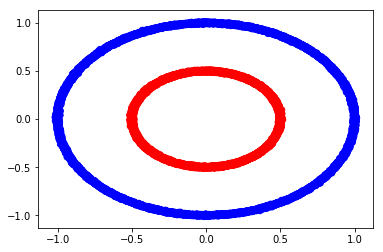

In [4]:
#generate some  non-linearly separrable data 
n=10000
t = np.linspace(0,2,n)

np.random.seed(123)
x1 = np.sin(np.pi*t) + np.random.normal(0,.005,n)
x2 = np.cos(np.pi*t) + np.random.normal(0,.005,n)
label = np.ones(n)

tdf = pd.DataFrame({'label' : label, 'x1' : x1, 'x2' : x2})

t = np.linspace(0,2,n)
x1 = .5*np.sin(np.pi*t) + np.random.normal(0,.005,n)
x2 = .5*np.cos(np.pi*t) + np.random.normal(0,.005,n)
label = 0.*np.ones(n)

df = pd.concat([tdf, pd.DataFrame({'label' : label, 'x1' : x1, 'x2' : x2})])
plt.scatter(df['x1'],df['x2'], color=df['label'].apply(lambda x :  'b' if x > .5 else 'r'))

In [5]:
#separate features and labels
X = df[['x1','x2']]
Y = df['label']

In [6]:
#train test split
from sklearn.model_selection import train_test_split
X_model, X_test, y_model, y_test = train_test_split(X,Y, test_size=0.20, random_state=123)

In [8]:
#initialize Sequential model
model = Sequential()
#intitalize input layer 
model.add(Dense(2, input_dim=2, activation='relu'))
#hidden layer with relu activation
model.add(Dense(8, activation='relu'))
#output layer / decision layer 
model.add(Dense(1, activation='sigmoid'))

In [15]:
model.compile(loss='binary_crossentropy',  optimizer='adam', metrics=['accuracy'])

For any questions relating to [binary cross-entropy](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a).

In [16]:
model.fit(X_model, y_model, epochs=10, batch_size=10)

Epoch 1/10
16000/16000 [==============================] - 1s 79us/step - loss: 0.1805 - acc: 0.9516
Epoch 2/10
16000/16000 [==============================] - 1s 64us/step - loss: 0.1795 - acc: 0.9562
Epoch 3/10
16000/16000 [==============================] - 1s 64us/step - loss: 0.1775 - acc: 0.9577
Epoch 4/10
16000/16000 [==============================] - 1s 64us/step - loss: 0.1763 - acc: 0.9569
Epoch 5/10
16000/16000 [==============================] - 1s 65us/step - loss: 0.1742 - acc: 0.9579
Epoch 6/10
16000/16000 [==============================] - 1s 63us/step - loss: 0.1726 - acc: 0.9589
Epoch 7/10
16000/16000 [==============================] - 1s 63us/step - loss: 0.1716 - acc: 0.9618
Epoch 8/10
16000/16000 [==============================] - 1s 64us/step - loss: 0.1705 - acc: 0.9616
Epoch 9/10
16000/16000 [==============================] - 1s 64us/step - loss: 0.1680 - acc: 0.9626
Epoch 10/10
16000/16000 [==============================] - 1s 63us/step - loss: 0.1675 - acc: 0.9638

In [17]:
model.evaluate(X_test, y_test)

4000/4000 [==============================] - 0s 21us/step


[0.17795154464244842, 0.964]

## Optimization and Regularization

### L1 and L2 Regularization

### Dropout Regularization

<img src='images/thanos.png'/>


[Original paper on dropout regularization.](http://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)

### Optimization 

- Optimizers 
- Number of nodes
- Number of layers
- Number of Epochs 
- Batch size 
- Learning Rate
- Different Activation Functions
- Scaling/Normalizing Data

Optimization and Regularization

<img src='https://cdn-images-1.medium.com/max/1600/1*ZS7xxm9jkGIcRnH3QKs02g.gif'>

## Let's play with Hyperparameter tuning

[Google Playground](https://developers.google.com/machine-learning/crash-course/introduction-to-neural-networks/playground-exercises)

## Hyperparameter Tuning


- **Number of Hidden Layers**

*For many problems you can start with just one or two hidden layers and it will work just fine. For more complex problems, you can gradually ramp up the number of hidden layers until your model starts to over fit. Very complex tasks, like image classification, will need dozens of layers.*

- **Number of Neurons per layer**

*The number of nuerons for the input and output layers are dependent on your data and the task. For hidden layers, a common practice is to create a funnel with fewer and fewer neurons per layer.*

*In general, you will get more bang for your buck by adding on more layers than adding more neurons.*

- **[Activation Functions](https://towardsdatascience.com/exploring-activation-functions-for-neural-networks-73498da59b02)**
    - Linear
    - Sigmoid
    - Softmax
    - Tanh
    - ReLu
    - elu
    
*In most cases you can use the ReLu activation function (or one of its variants) in the hidden layers. For the output layer, the softmax activation function is generally good for multiclass problems and the sigmoid function for binary classification problems. For regression tasks, you can simply use no activation function at all*

- [Selecting an optimizer](https://www.dlology.com/blog/quick-notes-on-how-to-choose-optimizer-in-keras/)
    - Adam
    - SGD
    - RMSprop
    - Adagrad

- **Learning Rate**

*If you set it too low, training will eventually converge, but it will do so slowly.*
*If you set it too high, it might acutally diverge.*
*If you set it slightly too high, it will converge at first but miss the local optima.*


- **Regularization** 
    - L1 and L2
    - Dropout
    
    *the most popular technique for deep neural networks. It is a fairly simple algorithm where at every training step, every neuron has a probability for being temporarily "droppedout," meaning it will be completely ignored dureing this traing step, but it may be active during the next step.*
    
    - [Early Stopping](https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/)
    
    *Just interrupt training when its performance on the validation set starts dropping*
    
    
[Paper on selecting hyperparameters](https://arxiv.org/pdf/1206.5533v2.pdf)

## Resources

https://www.youtube.com/watch?v=u5GAVdLQyIg

https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi

https://www.coursera.org/learn/neural-networks-deep-learning/home/welcome

https://towardsdatascience.com/optimizing-neural-networks-where-to-start-5a2ed38c8345